In [ ]:
# Importing dependencies
import numpy as np  #python library for scientific computing
import pandas as pd #python library for data analysis and dataframes
import matplotlib.pyplot as plt #python library for plot and graphs

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Read data file from google drive
data = pd.read_csv('/content/drive/My Drive/My_Courses/Machine_Learning/input/Irregation_one_variable.txt', header=None)
data.head()

,0,1
0,2524,360.416
1,1600,229.914
2,730,150.125
3,1730,132.013
4,3000,439.210


In [ ]:
# Give a name to each column and display some rows
data.columns =(['Size','Irrigation_quantity'])
data.head()

,Size,Irrigation_quantity
0,2524,360.416
1,1600,229.914
2,730,150.125
3,1730,132.013
4,3000,439.210


In [ ]:
# Extract Size column (X), irrigation_quantity column (y)  and number of examples m
X = np.array(data.drop('Irrigation_quantity',axis=1))
y = np.array(data.Irrigation_quantity)
m = len(data)
y = y.reshape((m,1))
print(m)

75


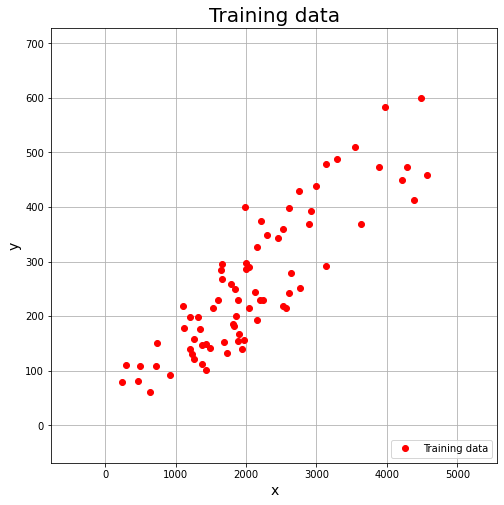

In [ ]:
# Represent the scatter plot of the amount of irrigation quantity as a function of the garden area
fig = plt.figure(figsize=(8,8))
plt.plot(X,y,'ro', label='Training data')
plt.title('Training data', size = 20)
plt.xlabel('x', size=14)
plt.ylabel('y', size=14)
plt.axis([X.min()-X.std(),X.max()+X.std(),y.min()-y.std(),y.max()+y.std()])
plt.grid(axis='both')
plt.legend(loc='lower right')
plt.show()

In [ ]:
def cost_function(X, y, w):
    z = np.ones((len(X),1))
    X = np.append(z, X, axis=1)
    h = X.dot(w)
    d = (h-y.flatten())
    C = d.dot(d)/2/(len(X))
    return C

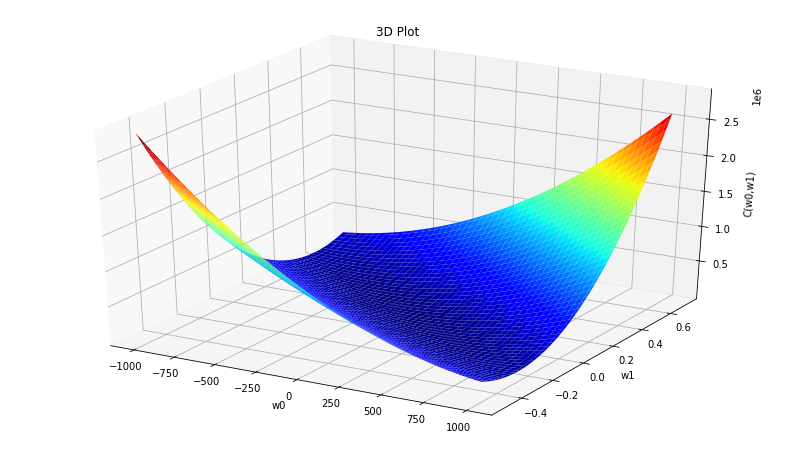

In [ ]:
#------------------------------Plot Cost function-----------------------------------------------
#Grid over which we will calculate C
w1_vals =  np.linspace(-0.5, 0.7, 100)
w0_vals = np.linspace( -1000,1000, 100)
#initialize C_vals to a matrix of 0's
C_vals = np.zeros((w0_vals.size, w1_vals.size))

#Fill out C_vals
for t1, element in enumerate(w0_vals):
    for t2, element2 in enumerate(w1_vals):
        wT = np.zeros(shape=(2, 1))
        wT[0][0] = element
        wT[1][0] = element2
        C_vals[t1, t2] = cost_function(X, y, wT.flatten())
C_vals = C_vals.T


A, B = np.meshgrid(w0_vals, w1_vals)
C = C_vals
#---------------------------------------------
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection="3d")
#ax.plot_surface(A, B, C,cmap="viridis")
ax.plot_surface(A, B, C,cmap="jet")
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('C(w0,w1)')
plt.title('3D Plot')

plt.show()

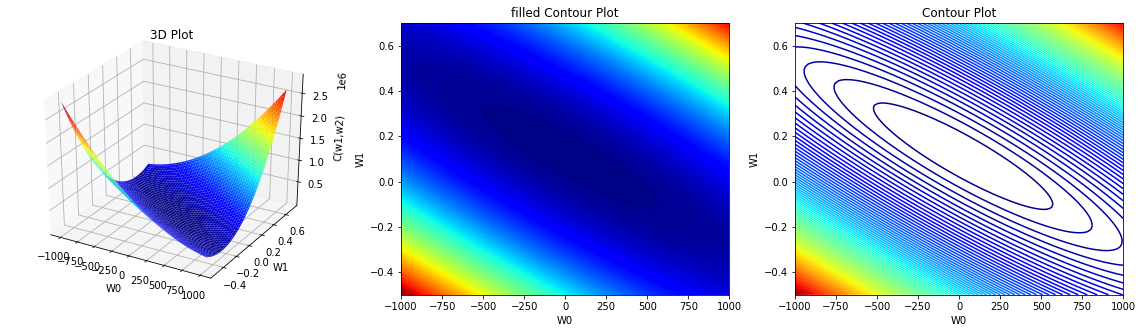

In [ ]:
fig = plt.figure(figsize=(20,5))

# 1- 3D plot
ax = fig.add_subplot(1,3,1, projection='3d')
ax.plot_surface(A, B, C,cmap="jet")
ax.set_xlabel('W0')
ax.set_ylabel('W1')
ax.set_zlabel('C(w1,w2)')
plt.title('3D Plot')

# 2- filled Contour Plot
ax=fig.add_subplot(1,3,2)
ax.contourf(A, B, C,levels=100,cmap="jet")
ax.set_xlabel('W0')
ax.set_ylabel('W1')
plt.title('filled Contour Plot')

# 2- Contour Plot  
ax=fig.add_subplot(1,3,3)
ax.contour(A, B, C,levels=100,cmap="jet")
ax.set_xlabel('W0')
ax.set_ylabel('W1')
plt.title('Contour Plot')
plt.show()

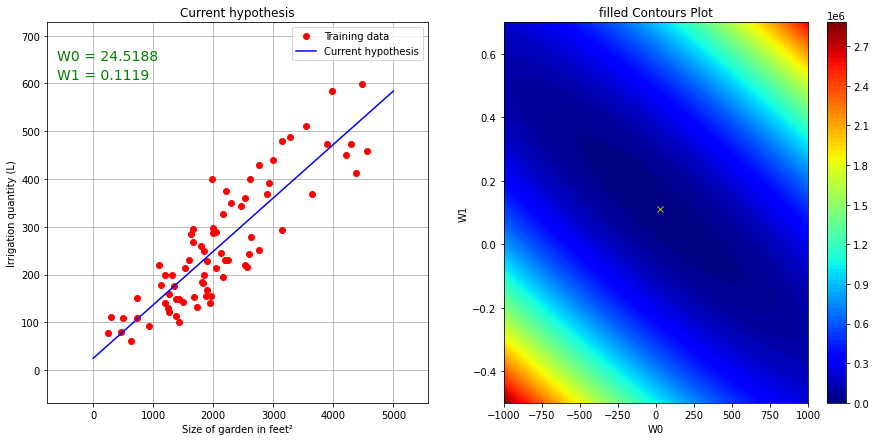

In [ ]:
W=[ 24.51878916, 0.11194286]
fig = plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(X,y,'ro', label='Training data')
plt.title('Current hypothesis')
plt.axis([X.min()-X.std(),X.max()+X.std(),y.min()-y.std(),y.max()+y.std()])
plt.grid(axis='both')
plt.xlabel("Size of garden in feet²")
plt.ylabel("Irrigation quantity (L)")
plt.legend(loc='lower right')


lineX = np.linspace(0,5000, 100)
liney = [W[0] + W[1]*xx for xx in lineX]
plt.plot(lineX,liney,'b', label='Current hypothesis')
plt.grid(True)
plt.legend()


c=cost_function(X, y, W)
annotation1 = plt.text(-600, 650,'',fontsize=20,color='green',size=14)
annotation1.set_text('W0 = %.4f' %(W[0]))
annotation1 = plt.text(-600, 610,'',fontsize=20,color='green',size=14)
annotation1.set_text('W1 = %.4f' %(W[1]))

ax=plt.subplot(122)
cp = ax.contourf(A, B, C,levels=100,cmap="jet")
plt.colorbar(cp)
plt.title('filled Contours Plot')
plt.xlabel('W0')
plt.ylabel('W1')
plt.plot(W[0] , W[1],'yx')

plt.show()